# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# imports
import re
import os
import json
import tweepy
import requests
import pandas as pd
import matplotlib.pyplot as plt
from tweepy import OAuthHandler
from timeit import default_timer as timer

In [2]:
# read in twitter archive file
df = pd.read_csv('twitter_archive_enhanced.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# Create a folder named 'image_predictions' if it doesn't already exist
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Send a GET request to download the image predictions file from a URL
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv', auth=('user', 'pass'))

# Save the downloaded file as 'image_predictions.tsv'
with open('image_predictions.tsv', mode='wb') as file:
    file.write(r.content)

# Read and display the downloaded file into a pandas DataFrame
image_df = pd.read_csv('image_predictions.tsv', sep='\t')
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [5]:
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df.tweet_id.values
len(tweet_ids)

2356

In [6]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [7]:
# Create an empty list to store the extracted data
data = []

# Open the 'tweet_json.txt' file in read mode
with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        
        # Extract the required data from the JSON object
        # Append the extracted data as a dictionary to the 'data' list
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        data.append({'tweet_id': tweet_id, 'retweet_count': retweet_count, 'favorite_count': favorite_count})

# Create and display a pandas DataFrame from the 'data' list
tweet_df = pd.DataFrame(data, columns=['tweet_id', 'retweet_count', 'favorite_count'])
tweet_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
and programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [8]:
# Visual assesments
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
image_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [10]:
tweet_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [11]:
# Programmatic assesments
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [14]:
df.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1153,725729321944506368,NaN,NaN,2016-04-28 16:52:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lola. She's a Butternut Splishnsplash....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/725729321...,12,10,Lola,None,None,None,None
165,860177593139703809,NaN,NaN,2017-05-04 17:01:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Ohboyohboyohboyohboyohboyohboyo...,7.616730e+17,4.196984e+09,2016-08-05 21:19:27 +0000,https://twitter.com/dog_rates/status/761672994...,10,10,None,None,None,None,None
678,789268448748703744,NaN,NaN,2016-10-21 00:53:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stella. She's happier than I will ever...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789268448...,10,10,Stella,None,None,None,None
166,859924526012018688,NaN,NaN,2017-05-04 00:15:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Milky. She has no idea what happened. Jus...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859924526...,12,10,Milky,None,None,None,None
1818,676593408224403456,NaN,NaN,2015-12-15 02:43:33 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This pupper loves leaves. 11/10 for committed ...,NaN,NaN,NaN,https://vine.co/v/eEQQaPFbgOY,11,10,None,None,None,pupper,None
1781,677698403548192770,NaN,NaN,2015-12-18 03:54:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sadie. She got her holidays confused. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677698403...,9,10,Sadie,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2069,671134062904504320,NaN,NaN,2015-11-30 01:10:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Clarence. He's a western Alkaline...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671134062...,8,10,Clarence,None,None,None,None
1247,711652651650457602,NaN,NaN,2016-03-20 20:36:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gary. He just wanted to say hi. 9/10 v...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/711652651...,9,10,Gary,None,None,None,None
289,838201503651401729,NaN,NaN,2017-03-05 01:36:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Sunny. He can take down a ...,8.207497e+17,4.196984e+09,2017-01-15 21:49:15 +0000,https://twitter.com/dog_rates/status/820749716...,13,10,Sunny,None,None,None,None


In [15]:
image_df.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
822,693109034023534592,https://pbs.twimg.com/ext_tw_video_thumb/69310...,1,cocker_spaniel,0.740013,True,Welsh_springer_spaniel,0.088739,True,golden_retriever,0.047470,True
1915,854365224396361728,https://pbs.twimg.com/media/C9tQokgUIAEETSx.jpg,1,Pembroke,0.907080,True,Cardigan,0.086272,True,Chihuahua,0.001413,True
958,705475953783398401,https://pbs.twimg.com/media/CcpaoR9WAAAKlJJ.jpg,1,golden_retriever,0.908784,True,Labrador_retriever,0.030361,True,tennis_ball,0.004996,False
786,690360449368465409,https://pbs.twimg.com/media/CZSnKw8WwAAAN7q.jpg,1,pug,0.686933,True,French_bulldog,0.076359,True,Brabancon_griffon,0.035007,True
875,698195409219559425,https://pbs.twimg.com/media/CbB9BTqW8AEVc2A.jpg,1,Labrador_retriever,0.643690,True,American_Staffordshire_terrier,0.102684,True,dalmatian,0.050008,True
600,679736210798047232,https://pbs.twimg.com/media/CW7oelWWcAAhyzz.jpg,1,French_bulldog,0.319139,True,Chihuahua,0.154088,True,Cardigan,0.117688,True
239,670435821946826752,https://pbs.twimg.com/media/CU3d0azWUAA38FD.jpg,1,sorrel,0.460370,False,basenji,0.135767,True,Cardigan,0.099174,True
1710,818259473185828864,https://pbs.twimg.com/media/C1sKo_QUkAALtkw.jpg,1,miniature_schnauzer,0.367368,True,toy_poodle,0.112479,True,standard_schnauzer,0.095434,True
2058,888917238123831296,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,1,golden_retriever,0.714719,True,Tibetan_mastiff,0.120184,True,Labrador_retriever,0.105506,True
299,671486386088865792,https://pbs.twimg.com/media/CVGZTboUsAATohd.jpg,1,German_shepherd,0.827035,True,kelpie,0.087648,True,red_wolf,0.031218,False


In [16]:
tweet_df.sample(20)

,tweet_id,retweet_count,favorite_count
1805,676916996760600576,2002,3231
1258,710269109699739648,1257,2613
103,872261713294495745,6649,35085
1504,691756958957883396,1161,3179
1016,746818907684614144,1944,5807
669,789986466051088384,2704,10369
625,795076730285391872,6288,18139
1901,674638615994089473,650,1806
2167,669353438988365824,281,687
86,875144289856114688,5081,22185


From the programmatic and visuals we can see a few odd data that needs to be investigated farther.
This includes:

- Invalid dog names
- Invalid denominator and numerator values
- Inconsitent naming convention of dog breeds

In [17]:
df.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Lola          10
Penny         10
Tucker        10
Bo             9
Winston        9
the            8
Sadie          8
Bailey         7
Toby           7
Daisy          7
Buddy          7
an             7
Bella          6
Leo            6
Rusty          6
Jax            6
Dave           6
Milo           6
Stanley        6
Scout          6
Jack           6
Oscar          6
Koda           6
Sunny          5
            ... 
Charleson      1
Jeffrie        1
Ito            1
Kona           1
Bobble         1
Howie          1
Heinrich       1
Rooney         1
Bubba          1
Juckson        1
Apollo         1
Dot            1
Koko           1
Sonny          1
Brady          1
Tiger          1
Smiley         1
Horace         1
by             1
Oddie          1
Fabio          1
Jed            1
Snickers       1
Pluto          1
Mitch          1
Kellogg        1
Blanket        1
Strider       

In [18]:
df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [19]:
df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [20]:
image_df.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
web_site                      19
Cardigan                      19
Maltese_dog                   18
Shetland_sheepdog             18
teddy                         18
Eskimo_dog                    18
beagle                        18
Shih-Tzu                      17
Lakeland_terrier              17
Rottweiler                    17
kuvasz                        16
Italian_greyhound             16
          

Let us see if data has any duplicated rows for both twitter archive dataframe and image dataframe.

In [21]:
sum(df.expanded_urls.duplicated())

137

In [22]:
sum(image_df.jpg_url.duplicated())

66

### Quality issues

1. Incorrect dog names in twitter archive dataframe

2. Some tweets are not original but retweets in twitter archive dataframe

3. Invalid denominator ratings in twitter archive dataframe

4. Invalid numerator ratings in twitter archive dataframe

5. Incorrect data type for timestamp column in twitter archive dataframe 

6. Missing values in multiple column of the twitter archive dataframe

7. Column tweet_id datatype is int in all dataframe
 
8. Some dog breeds names are capitalized others aren't in image dataframe

9. Duplicated columns in image and twitter archive dataframe

### Tidiness issues
1. Having multiple columns for dog stage is untidy in the twitter archive dataframe

2. The tweet_df and df could be a single dataframe instead of seperate

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [23]:
# Make copies of original pieces of data
df_copy = df.copy()
image_copy = image_df.copy()
tweet_copy = tweet_df.copy()

## Quality

### Issue #1:

#### Define:

- Replace all invalid dog with None
- First find lowercase names (which are likely not names at all) then perform the replace function

#### Code

In [24]:
# Replaces all lower case names with None
df_copy.name = df_copy.name.str.replace('^[a-z]+', 'None')

#### Test

In [25]:
df_copy.name.value_counts()

None        854
Charlie      12
Lucy         11
Cooper       11
Oliver       11
Penny        10
Tucker       10
Lola         10
Winston       9
Bo            9
Sadie         8
Bailey        7
Toby          7
Daisy         7
Buddy         7
Dave          6
Koda          6
Stanley       6
Leo           6
Scout         6
Milo          6
Jax           6
Rusty         6
Bella         6
Oscar         6
Jack          6
Sunny         5
Bentley       5
Chester       5
Alfie         5
           ... 
Nugget        1
Evy           1
Gustav        1
Peanut        1
Ashleigh      1
Millie        1
Kellogg       1
Mitch         1
Pluto         1
Snickers      1
Tuck          1
Rufio         1
Socks         1
Monster       1
Vinnie        1
Lulu          1
Rooney        1
Juckson       1
Apollo        1
Dot           1
Koko          1
Sonny         1
Brady         1
Tiger         1
Smiley        1
Horace        1
Bubba         1
Fabio         1
Jed           1
Sprout        1
Name: name, Length: 932,

### Issue #2:

#### Define

- Retweets are a repition of original tweet and so have the same data
- Remove any row where `retweeted_status_id` is non-null

#### Code

In [26]:
# If retweeted_status_id not Null, drop row
df_copy.drop(df_copy[df_copy['retweeted_status_id'].notnull()==True].index, inplace=True)

#### Test

In [27]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

### Issue #3:

#### Define

- The standard denominator rating is 10
- Repace all non 10 digits with 10
- Convert rating_denominator to float type

#### Code

In [28]:
# Set all values in rating_denominator to 10 and convert to float
df_copy.loc[:, 'rating_denominator'] = 10
df_copy.rating_denominator = df_copy.rating_denominator.astype(float)

#### Test

In [29]:
df_copy.rating_denominator.value_counts()

10.0    2175
Name: rating_denominator, dtype: int64

### Issue #4:

#### Define

- Some of the invalid numerator are due to floats converted to ints
- Use regex and loop through text once more to retrieve the correct numerator values
- Convert rating_numerator from int type to float type

#### Code

In [30]:
numerator_values = []

# Loop over each row in the 'text' column
for row in df_copy['text']:
    
    # Define a regular expression pattern to match numerical values
    # Search matches of the pattern in the current row
    pattern = r'(\d+(\.\d+)?)'
    match = re.search(pattern, row)
    
    # Extract the first match from the matches list 
    # If no matches were found, set the numerator to None
    if match:
        numerator = float(match.group())
    else:
        numerator = None
           
    numerator_values.append(numerator)
    
df_copy['rating_numerator'] = numerator_values

#### Test

In [31]:
df_copy.rating_numerator.value_counts()

12.00      488
10.00      429
11.00      408
13.00      299
9.00       147
8.00        99
7.00        50
14.00       40
6.00        35
5.00        33
3.00        28
2.00        24
4.00        24
1.00        13
0.00         7
420.00       2
80.00        2
31.00        2
50.00        2
100.00       2
17.00        2
2015.00      2
13.50        1
46.00        1
24.00        1
84.00        1
44.00        1
960.00       1
400.00       1
60.00        1
143.00       1
20.00        1
144.00       1
97.00        1
150.00       1
165.00       1
1949.00      1
2016.00      1
61.00        1
33.00        1
45.00        1
204.00       1
47.00        1
9.75         1
98.00        1
182.00       1
236.00       1
2003.00      1
92.49        1
121.00       1
1776.00      1
2002.00      1
8.98         1
11.27        1
11.26        1
15.00        1
22.00        1
88.00        1
9.50         1
Name: rating_numerator, dtype: int64

### Issue #5:

#### Define

- Convert timestamp column to datetime data type

#### Code

In [32]:
# Convert timestamp column to datetime data type
df_copy['timestamp'] = pd.to_datetime(df_copy['timestamp'])

#### Test

In [33]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null float64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1),

### Issue #6:

#### Define

- Multiple columns in the twitter archive dataframe have NaN values
- I will remove the columns as they aren't necessary for analysis

#### Code

In [34]:
# Define list of columns to remove and drop from df
columns_to_remove = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
df_copy = df_copy.drop(columns_to_remove, axis=1)

#### Test

In [35]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 220.9+ KB


### Issue #7:

#### Define

- Conver datatype of tweeter_id column from int to string in all dataframes

#### Code

In [36]:
# Conver datatype of tweeter_id column from int to string in all dataframes
df_copy['tweet_id'] = df_copy['tweet_id'].astype(str)
image_copy['tweet_id'] = image_copy['tweet_id'].astype(str)
tweet_copy['tweet_id'] = tweet_copy['tweet_id'].astype(str)

#### Test

In [37]:
print(df_copy['tweet_id'].dtypes)
print(image_copy['tweet_id'].dtypes)
print(tweet_copy['tweet_id'].dtypes)

object
object
object


### Issue #8:

#### Define

- Capitalize all names in p1, p2, and p3
- First replace any and underscore with a space

#### Code

In [38]:
pred_col = ['p1', 'p2', 'p3']

# Replace underscore with space in dog breeds and capitalize
for col in pred_col:
    image_copy[col] = image_copy[col].str.replace('_', ' ')
    image_copy[col] = image_copy[col].str.title()

#### Test

In [39]:
image_copy.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1482,781163403222056960,https://pbs.twimg.com/media/Ctc_-BTWEAAQpZh.jpg,1,Shetland Sheepdog,0.973841,True,Collie,0.025188,True,Border Collie,0.000297,True
1116,725729321944506368,https://pbs.twimg.com/media/ChJO9YaWYAEL0zC.jpg,1,Boxer,0.599076,True,Bull Mastiff,0.177318,True,French Bulldog,0.141461,True
1250,747885874273214464,https://pbs.twimg.com/media/CmEGMSvUYAAl3ZM.jpg,1,Kuvasz,0.408450,True,Samoyed,0.141330,True,Pug,0.083018,True
1878,846153765933735936,https://pbs.twimg.com/media/C74kWqoU8AEaf3v.jpg,1,Giant Schnauzer,0.346468,True,Flat-Coated Retriever,0.218451,True,Labrador Retriever,0.108020,True
718,685667379192414208,https://pbs.twimg.com/media/CYP62A6WkAAOnL4.jpg,1,Sliding Door,0.344526,False,Doormat,0.190027,False,Washbasin,0.046326,False
1677,813187593374461952,https://pbs.twimg.com/media/C0kFzOQUoAAt6yb.jpg,1,Golden Retriever,0.888181,True,Labrador Retriever,0.042312,True,Saluki,0.009702,True
363,672877615439593473,https://pbs.twimg.com/media/CVaKn75XAAEU09u.jpg,1,Chihuahua,0.412362,True,Beagle,0.068066,True,Borzoi,0.045071,True
1739,822462944365645825,https://pbs.twimg.com/media/C2n5rUUXEAIXAtv.jpg,3,Pomeranian,0.960199,True,Samoyed,0.023056,True,Maltese Dog,0.008945,True
1722,819711362133872643,https://pbs.twimg.com/media/C2AzHjQWQAApuhf.jpg,2,Acorn Squash,0.848704,False,Toilet Seat,0.044348,False,Toy Poodle,0.022009,True
260,670783437142401025,https://pbs.twimg.com/media/CU8Z-OxXAAA-sd2.jpg,1,Lacewing,0.381955,False,Sulphur Butterfly,0.106810,False,Leafhopper,0.068347,False


### Issue #9:

#### Define

- Use `drop_duplicates` with `subset` to remove duplicate rows in the twitter archive and image dataframe

#### Code

In [40]:
# Remove dupilcated from df_copy and image_copy with expanded_urls and jpg_url columns
df_copy.drop_duplicates(subset='expanded_urls', inplace=True)
image_copy.drop_duplicates(subset='jpg_url', inplace=True)

#### Test

In [41]:
sum(df_copy.expanded_urls.duplicated())

0

In [42]:
sum(image_copy.jpg_url.duplicated())

0

## Tidiness

### Issue #2:

#### Define

- I will combine the doggo, floofer, pupper, and puppo into one dog_stage column
- I Will use `extract` to retrieve the dog stage from text and add it to the dog_stage column
- Then remove the individual columns

#### Code

In [43]:
# Extract dog stage from text and and to dog_stage column
df_copy['dog_stage'] = df_copy['text'].str.extract('(doggo|floofer|pupper|puppo)')
df_copy['dog_stage'].fillna(value='None', inplace=True)

In [44]:
columns_to_remove = ['doggo', 'floofer', 'pupper', 'puppo']
df_copy = df_copy.drop(columns_to_remove, axis=1)

df_copy['dog_stage'] = df_copy['dog_stage'].str.title()

#### Test

In [45]:
df_copy.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1418,698355670425473025,2016-02-13 03:59:01,"<a href=""http://twitter.com/download/iphone"" r...",This is Jessiga. She's a Tasmanian McCringlebe...,https://twitter.com/dog_rates/status/698355670...,10.0,10.0,Jessiga,None
1587,686749460672679938,2016-01-12 03:20:05,"<a href=""http://twitter.com/download/iphone"" r...",Strange pup here. Easily manipulated. Rather i...,https://twitter.com/dog_rates/status/686749460...,8.0,10.0,None,None
292,838083903487373313,2017-03-04 17:49:08,"<a href=""http://twitter.com/download/iphone"" r...",This is Daisy. She's puppears to be rare as al...,https://twitter.com/dog_rates/status/838083903...,13.0,10.0,Daisy,None
1658,683111407806746624,2016-01-02 02:23:45,"<a href=""http://twitter.com/download/iphone"" r...",This is Larry. He thought the New Year's parti...,https://twitter.com/dog_rates/status/683111407...,10.0,10.0,Larry,Pupper
2310,666786068205871104,2015-11-18 01:12:41,"<a href=""http://twitter.com/download/iphone"" r...",Unfamiliar with this breed. Ears pointy af. Wo...,https://twitter.com/dog_rates/status/666786068...,2.0,10.0,None,None
363,829374341691346946,2017-02-08 17:00:26,"<a href=""http://twitter.com/download/iphone"" r...",This is Astrid. She's a guide doggo in trainin...,https://twitter.com/dog_rates/status/829374341...,13.0,10.0,Astrid,Doggo
1762,678643457146150913,2015-12-20 18:29:43,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizz. He just arrived. Couldn't wait unt...,https://twitter.com/dog_rates/status/678643457...,10.0,10.0,Grizz,None
999,748220828303695873,2016-06-29 18:25:21,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Stop what you're doing and watch this heckin m...,https://vine.co/v/iiLjKuYJpr6,13.0,10.0,None,None
443,819347104292290561,2017-01-12 00:55:47,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Anna and Elsa. They fall asleep i...,https://twitter.com/dog_rates/status/819347104...,12.0,10.0,Anna,None
1327,705975130514706432,2016-03-05 04:36:02,"<a href=""http://twitter.com/download/iphone"" r...",This is Adele. Her tongue flies out of her mou...,https://twitter.com/dog_rates/status/705975130...,10.0,10.0,Adele,Pupper


## Issue #2:

#### Define

- Use `merge` to combine the tweeter archive and tweeter json dataframes

#### Code

In [46]:
# Merge df_copy to tweet_copy on tweet_id
merged_df = pd.merge(df_copy, tweet_copy, on='tweet_id')

In [47]:
# We'll only be using the first prediction
columns_to_remove = ['p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']
image_copy = image_copy.drop(columns_to_remove, axis=1)

In [48]:
# Merge merged_df to image_copy on tweet_id
master_df = pd.merge(merged_df, image_copy, on='tweet_id')

#### Test

In [49]:
master_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper Towel,0.170278,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True


In [50]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 16 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null float64
name                  1994 non-null object
dog_stage             1994 non-null object
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(3), int64(3), object(8)
memory usage: 251.2+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [51]:
master_df.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [52]:
master_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper Towel,0.170278,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True


In [53]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 16 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null float64
name                  1994 non-null object
dog_stage             1994 non-null object
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(3), int64(3), object(8)
memory usage: 251.2+ KB


In [54]:
master_df.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf
count,1994.000000,1994.0,1994.000000,1994.000000,1994.000000,1994.000000
mean,18.765923,10.0,2766.753260,8895.725677,1.203109,0.593941
std,117.074164,0.0,4674.698447,12213.193181,0.560777,0.271954
min,0.000000,10.0,16.000000,81.000000,1.000000,0.044333
25%,10.000000,10.0,624.750000,1982.000000,1.000000,0.362857
50%,11.000000,10.0,1359.500000,4136.000000,1.000000,0.587635
75%,12.000000,10.0,3220.000000,11308.000000,1.000000,0.846285
max,2016.000000,10.0,79515.000000,132810.000000,4.000000,1.000000


### Questions:

1. Which dog stage is the most common?

2. Which dog breed has the highest average retweet and favorite count?

3. Which dog breed is the neural net most confident in classifying?

In [55]:
master_df['dog_stage'].value_counts()

None       1668
Pupper      223
Doggo        72
Puppo        28
Floofer       3
Name: dog_stage, dtype: int64

In [56]:
# Filter out tweets not related to dogs and group by dog breed
filtered_df = master_df[master_df['p1_dog'] == True]
grouped_df = filtered_df.groupby('p1')

# Calculate average of retweet_count by dog breed
# Display max and min breed with highest average retweet count
average_retweet_count = grouped_df['retweet_count'].mean()
sorted_breeds = average_retweet_count.sort_values(ascending=False)
sorted_breeds.idxmax()

'Standard Poodle'

In [57]:
sorted_breeds.idxmin()

'Brabancon Griffon'

In [58]:
# Repeat above for favorite_count
average_favorite_count = grouped_df['favorite_count'].mean()
sorted_breeds = average_favorite_count.sort_values(ascending=False)
sorted_breeds.idxmax()

'Saluki'

In [59]:
sorted_breeds.idxmin()

'Brabancon Griffon'

I want to make sure that the average of the retweet and favorite count is not to heavily influenced by the number of times each of the breed given appears.

From the results below, we can see that they do not appear to frequetly and so we can disregard frequency as a possible reason these breeds have low or high retweets and favorites. 

In [60]:
master_df['p1'].value_counts()

Golden Retriever             139
Labrador Retriever            95
Pembroke                      88
Chihuahua                     79
Pug                           54
Chow                          41
Samoyed                       40
Pomeranian                    38
Toy Poodle                    38
Malamute                      29
Cocker Spaniel                27
French Bulldog                26
Chesapeake Bay Retriever      23
Miniature Pinscher            22
Seat Belt                     21
Siberian Husky                20
German Shepherd               20
Staffordshire Bullterrier     19
Eskimo Dog                    18
Shetland Sheepdog             18
Teddy                         18
Maltese Dog                   18
Beagle                        17
Shih-Tzu                      17
Rottweiler                    17
Cardigan                      17
Kuvasz                        16
Italian Greyhound             16
Lakeland Terrier              16
Web Site                      15
          

In [61]:
master_df['p1'].value_counts().loc[['Standard Poodle', 'Saluki', 'Brabancon Griffon']]

Standard Poodle      7
Saluki               4
Brabancon Griffon    3
Name: p1, dtype: int64

In [62]:
# Find the dog breeds with the highest and lowest average predicted probability
average_p1_conf = grouped_df['p1_conf'].mean()
sorted_breeds = average_p1_conf.sort_values(ascending=False)
sorted_breeds.idxmax()

'Komondor'

In [63]:
sorted_breeds.idxmin()

'Scottish Deerhound'

In [64]:
master_df['p1'].value_counts().loc[['Komondor', 'Scottish Deerhound']]

Komondor              3
Scottish Deerhound    3
Name: p1, dtype: int64

Once again we can see that frequency of dog breed appearance does not factor into higher or lower probability average.

Furthermore, we can to see below that number of images for the network to make prediction from also does contribute greatly to the higher or lower probability average.

In [65]:
breed_img_total = grouped_df['img_num'].sum()
breed_img_total.sort_values(ascending=False)

p1
Golden Retriever               182
Pembroke                       111
Labrador Retriever             109
Chihuahua                       99
Pug                             61
Chow                            53
Pomeranian                      51
Toy Poodle                      49
Samoyed                         47
Malamute                        36
Cocker Spaniel                  32
Chesapeake Bay Retriever        31
French Bulldog                  29
Miniature Pinscher              29
German Shepherd                 25
Siberian Husky                  24
Shetland Sheepdog               23
Maltese Dog                     23
Beagle                          22
Cardigan                        22
Shih-Tzu                        22
Great Pyrenees                  22
Eskimo Dog                      22
Staffordshire Bullterrier       22
Rottweiler                      19
West Highland White Terrier     18
Italian Greyhound               17
Border Collie                   17
Lakeland Terrier 

In [66]:
breed_img_total.loc[['Komondor', 'Scottish Deerhound']]

p1
Komondor              5
Scottish Deerhound    3
Name: img_num, dtype: int64

### Insights:

1. Out of all the dog stages pupper is the most common, whilest floofer is the least common.

2. The most retweeted dog breed is the standard poodle. The least retweeted dog breed is brabancon griffon. 

3. The most favorited dog breed is the saluki. The least retweeted dog breed is brabancon griffon once again.

4. The neural network seems to be most confident classiying the komondor dog breed. Howevere, it's least confident predictions are with the scottish deerhound.

### Visualization

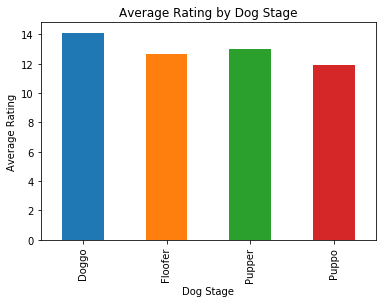

In [67]:
# Have a dataframe with only dog stage values
filtered_df = master_df[master_df['dog_stage'] != 'None']

# Group by dog_stage and calculate the average rating
average_ratings = filtered_df.groupby('dog_stage')['rating_numerator'].mean()

# Create a bar plot
average_ratings.plot(kind='bar')
plt.xlabel('Dog Stage')
plt.ylabel('Average Rating')
plt.title('Average Rating by Dog Stage')
plt.show();